In [4]:
import pandas as pd
import numpy as np
import Risk_Kit as erk
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
erk.bond_price(5, 100, 0.05, 12, 0.03)

0    109.275393
dtype: float64

In [7]:
rates, zc_prices = erk.cir(10, 500, b=0.03, r_0=0.03)

In [10]:
erk.bond_price(5, 100, 0.05, 12, rates.iloc[0][[1,2,3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [11]:
erk.bond_price(5, 100, 0.05, 12, rates.iloc[1][[1,2,3]])

1    111.180219
2    108.569220
3    109.804841
dtype: float64

In [12]:
rates[[1,2,3]].head()

,1,2,3
0,0.030000,0.030000,0.030000
1,0.026123,0.031456,0.028915
2,0.028487,0.031556,0.030852
3,0.032915,0.029094,0.031249
4,0.030858,0.030879,0.033375


<AxesSubplot:>

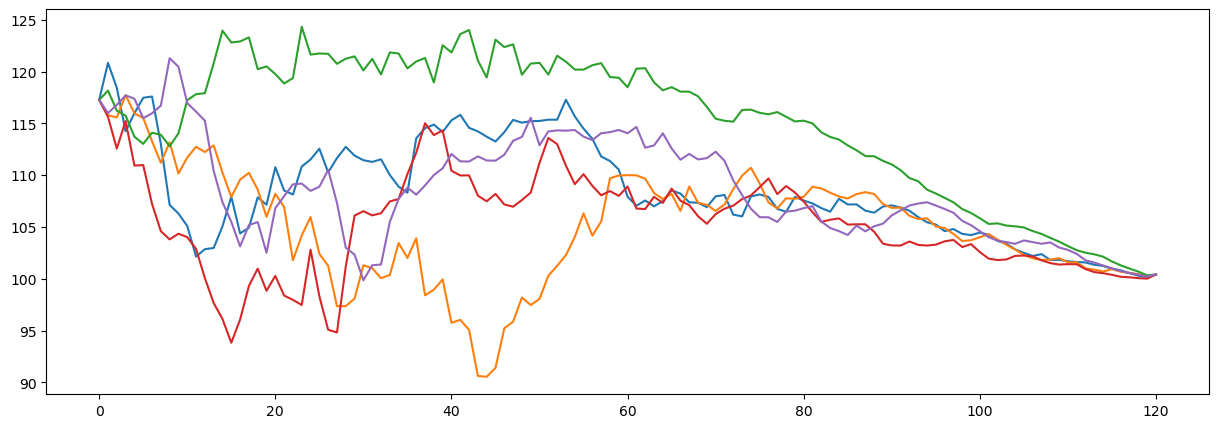

In [18]:
erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4,5]]).plot(legend=False, figsize=(15,5))

In [21]:
prices = erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4,5]])

In [22]:
br = prices.pct_change().dropna()
erk.annualized_rets(br, 12)

1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

In [27]:
p = erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4]])
btr = erk.bond_total_return(p, 100, .05, 12)
erk.annualized_rets(btr, 12)

1    0.031086
2    0.032711
3    0.028427
4    0.032559
dtype: object

In [30]:
price_10 = erk.bond_price(10, 100, 0.05, 12, rates)
price_10[[1,2,3]].tail()

,1,2,3
116,100.816481,100.672258,101.297315
117,100.543099,100.572455,100.984797
118,100.300166,100.443595,100.689054
119,100.166638,100.242738,100.334206
120,100.416667,100.416667,100.416667


In [32]:
price_30 = erk.bond_price(30, 100, 0.05, 12, rates)
price_30[[1,2,3]].tail()

,1,2,3
116,139.082416,130.943759,171.050065
117,133.651839,135.849846,171.929106
118,126.863513,142.917298,176.593995
119,130.225992,147.858887,173.101636
120,135.883271,152.963579,168.190317


In [33]:
price_30 = erk.bond_price(30, 100, 0.05, 12, rates)
price_30[[1,2,3]].head()

,1,2,3
0,139.531564,139.531564,139.531564
1,149.530222,135.919684,142.186411
2,143.203846,135.620059,137.312112
3,132.383104,141.587407,136.293041
4,137.169526,137.119617,131.280259


In [36]:
rets_30 = erk.bond_total_return(price_30, 100, 0.05, 12)
rets_10 = erk.bond_total_return(price_10, 100, 0.05, 12)

rets_bonds = .6*rets_10 + 0.4*rets_30

In [38]:
mean_rets_bonds = rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.035758,0.003661,0.568762,4.05508,-0.001401,-0.00093,1.53076,0.0


In [40]:
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu=0.07, sigma=0.15)
price_eq.shape

(121, 500)

In [42]:
rets_eq = price_eq.pct_change().dropna()
rets_eq.shape

(120, 500)

In [43]:
rets_bonds.shape

(120, 500)

In [44]:
rets = 0.7*rets_eq + 0.3*rets_bonds
rets_mean = rets.mean(axis='columns')
erk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.058814,0.005637,-0.000647,2.591549,-0.002096,-0.001585,4.975157,0.0
